# Decision Tree Regression

## Importing the libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split



## Importing the dataset

In [17]:
dataset = pd.read_csv('fraudTest.csv')
traindata =pd.read_csv('fraudTrain.csv')

# Drop the date columns from both datasets
dataset = dataset.drop(columns=['trans_date_trans_time', 'dob'])
traindata = traindata.drop(columns=['trans_date_trans_time', 'dob'])

# Identify non-numeric columns and drop them
non_numeric_columns = dataset.select_dtypes(exclude=[np.number]).columns
dataset = dataset.drop(columns=non_numeric_columns)
traindata = traindata.drop(columns=non_numeric_columns)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


## Training the Decision Tree Regression model on the whole dataset

In [19]:
# Prepare the features and target variable
X_train = traindata.iloc[:, 1:-1].values
y_train = traindata.iloc[:, -1].values

X_test = dataset.iloc[:, 1:-1].values
y_test = dataset.iloc[:, -1].values
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(X_train)
yield_test = imputer.transform(X_test)
# Train the model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

Prediction for the example features: [[ 2.29116393e+15  7.22443075e+01  2.92090000e+04  3.39659000e+01
  -8.09355000e+01  3.33497000e+05  1.33873525e+09  3.39755116e+01
  -8.08900086e+01]]


<ipython-input-20-dc77bb7a9e7a>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_amt), max(X_amt), 0.01).reshape(-1, 1)


ValueError: X has 1 features, but DecisionTreeRegressor is expecting 9 features as input.

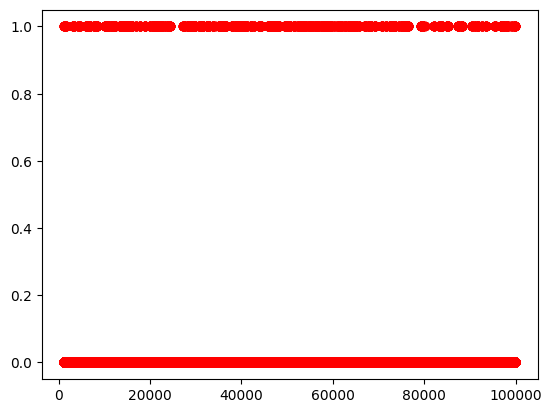

In [20]:
# Make a prediction for a specific example (replace with an appropriate example)
example_features = X_test[0].reshape(1, -1)  # Example: first instance from the test set
prediction = regressor.predict(example_features)
print(f'Prediction for the example features: {prediction}')

# For plotting, we need to reduce the dimensionality to a single feature (e.g., 'amt')
# This part assumes 'amt' is a column in the dataset. If not, replace 'amt' with the appropriate column name.
if 'amt' in dataset.columns:
    amt_index = dataset.columns.get_loc('amt')
    X_amt = X_test[:, amt_index].reshape(-1, 1)
    y_amt = y_test

    # Plotting
    X_grid = np.arange(min(X_amt), max(X_amt), 0.01).reshape(-1, 1)
    plt.scatter(X_amt, y_amt, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Credit card fraud (Decision Tree Regression)')
    plt.xlabel('amt')
    plt.ylabel('is_fraud')
    plt.show()
else:
    print("Column 'amt' not found in the dataset. Skipping plot.")